# UIDE - EIG

# Reto N° 3

# Nombres: Cristian Chamba.

In [166]:
import pandas as pd
import numpy as np
import seaborn as sb
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


Accuracy test: 97.71% 

Accuracy train: 99.9% 



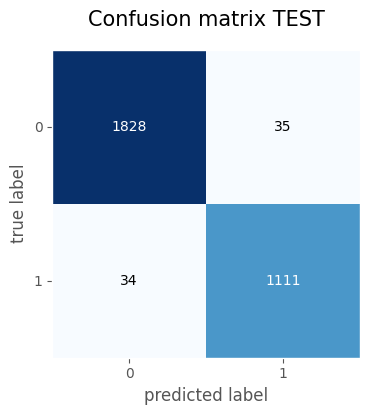

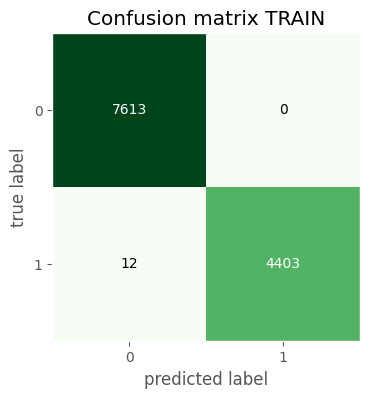

In [174]:
df = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")

X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

filename = 'finalized_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.score(X_test, y_test)
print(f"Accuracy test: {round(100 * result, 2)}% \n")

y_pred_test = clf.predict(X_test)
y_cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(y_cm, figsize=(4,4), show_normed=False, cmap ='Blues' )
plt.title('Confusion matrix TEST', y=1.05, size=15)



y_pred_train = clf.predict(X_train)
x_cm = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(x_cm, figsize=(4,4), show_normed=False, cmap ='Greens' )
plt.title('Confusion matrix TRAIN')

result = loaded_model.score(X_train, y_train)
print(f"Accuracy train: {round(100 * result, 2)}% \n")